In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from datetime import datetime
# from sklearn.impute import KNNImputer
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

import re
import ast
import warnings
from collections import Counter

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./raw_data/train.csv')

### Reports 

In [8]:
## shape and na  
## attach this to appendix, make a table of missing values num and % in report
## datatype: after dropping cols, objects contain: 1. boolean, 2. string/text, 3. list, 4. time
print('Shape of df_train: ', df.shape)   ## (15441, 48)
print('Col missing: \n  description, host_is_superhost, bathrooms_text, beds')
info_df = pd.DataFrame({'DataType': df.dtypes, 'NumOfNA': df.isna().sum(), '%OfNA': df.isnull().mean()*100})
info_df

Shape of df_train:  (15441, 48)
Col missing: 
  description, host_is_superhost, bathrooms_text, beds


,DataType,NumOfNA,%OfNA
id,int64,0,0.000000
scrape_id,int64,0,0.000000
last_scraped,object,0,0.000000
name,object,0,0.000000
description,object,225,1.457160
picture_url,object,0,0.000000
host_id,int64,0,0.000000
host_name,object,0,0.000000
host_since,object,0,0.000000
host_is_superhost,object,428,2.771841


In [6]:
## vars summary
## no attaching, since there is no use
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
count,15441.000000,1.544100e+04,1.544100e+04,15441.000000,15441.000000,15441.000000,15441.000000,15441.000000,15322.000000,15441.000000,15441.000000,15441.000000,15441.000000,15441.000000,1.544100e+04,1.544100e+04,15441.000000,1.544100e+04,15441.000000,15441.000000,15441.000000,15441.000000,15441.000000,15441.000000,15441.000000,15441.000000,15441.000000,15441.000000,15441.000000
mean,7720.000000,2.023090e+13,1.814302e+08,117.346286,174.791270,34.049962,-118.340461,5.079399,2.759627,1.961337,16.638430,513.701379,17.265592,22.390389,2.788482e+05,2.788735e+05,21.821423,2.788605e+05,15.716728,34.704099,55.518425,203.750988,30.985169,8.514086,0.817564,24.701638,22.946571,1.644194,0.086393
std,4457.577089,5.031413e+00,1.756812e+08,597.470382,813.486601,0.140982,0.169908,3.223242,1.933759,1.619984,30.164661,439.259357,35.177024,52.620049,2.443954e+07,2.443954e+07,51.451889,2.443954e+07,12.143686,23.392779,34.384775,134.904394,67.792226,15.477778,1.522905,89.448423,89.248426,7.342761,1.475507
min,0.000000,2.023090e+13,7.670000e+02,0.000000,0.000000,33.338600,-118.916410,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,3860.000000,2.023090e+13,2.372231e+07,1.000000,2.000000,33.997742,-118.438268,2.000000,1.000000,0.000000,2.000000,90.000000,2.000000,2.000000,3.650000e+02,3.650000e+02,2.000000,3.650000e+02,1.000000,9.000000,25.000000,82.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,7720.000000,2.023090e+13,1.084975e+08,3.000000,5.000000,34.061950,-118.361900,4.000000,2.000000,2.000000,5.000000,365.000000,4.000000,6.000000,1.125000e+03,1.125000e+03,5.000000,1.125000e+03,17.000000,41.000000,67.000000,215.000000,5.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000
75%,11580.000000,2.023090e+13,3.444546e+08,14.000000,23.000000,34.108080,-118.259989,7.000000,4.000000,3.000000,30.000000,1125.000000,30.000000,30.000000,1.125000e+03,1.125000e+03,30.000000,1.125000e+03,29.000000,58.000000,88.000000,343.000000,29.000000,10.000000,1.000000,11.000000,8.000000,0.000000,0.000000
max,15440.000000,2.023090e+13,5.349146e+08,4576.000000,9168.000000,34.797857,-117.653360,16.000000,50.000000,5.000000,1124.000000,3022.000000,1124.000000,1124.000000,2.147484e+09,2.147484e+09,1124.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000,1118.000000,183.000000,16.000000,692.000000,692.000000,78.000000,44.000000


### EDA Plots

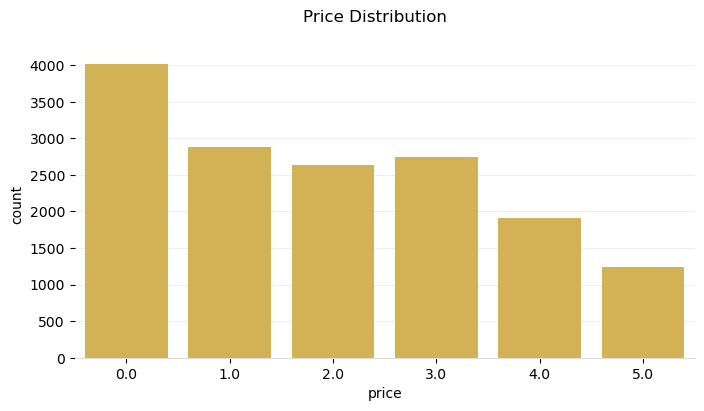

In [9]:
## price distribution

## normal distribution, mean = median = mode, skewed --> unequal

## if there are outliers and skewed data, mean will be skewed away, if normal, then mean and median will produce similar results
## A measure that is robust to outliers does not change much when outliers are present. 
# This means that the measure still accurately reflects the central tendency or spread of the majority of the data, 
# despite the presence of extreme values. 

# so even if outlier is very very large/small, median still get the value in the middle.
## the main purpose is to get an idea of the central tendency, typical/value of a distribution

## skewed distribution, 
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x = 'price', color = '#E8BA40')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
plt.grid(True, color='#EEEEEE', axis='y')
plt.gca().set_axisbelow(True)
plt.suptitle('Price Distribution', fontsize=12)
plt.savefig('./plot/price.png', format='png', dpi=300)
plt.show()

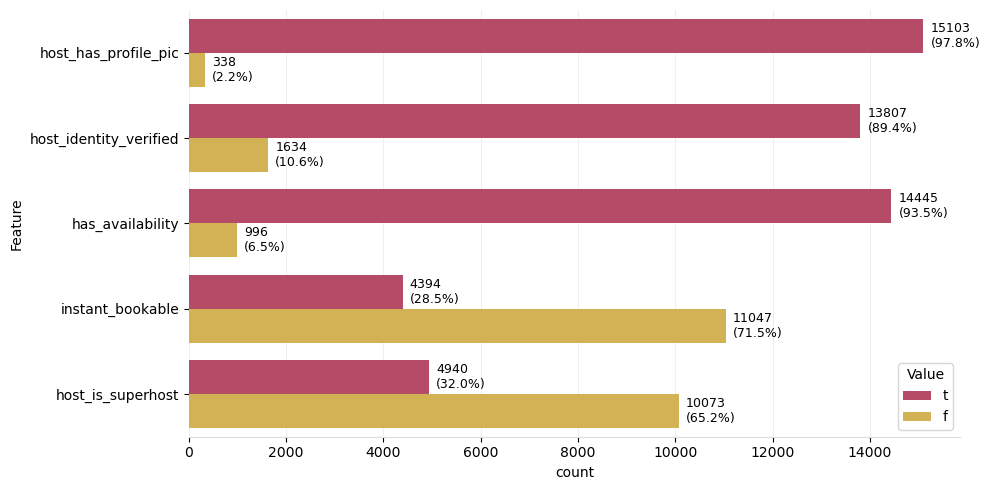

In [15]:
## binary without na
## we prefer to see balanced data instead of imbalancement, 
# the balance helps to prevent the model from beng biased towards the more frequent category (etc, models, such as ...)
## in most cases we would want to do oversampling/undersampling

## plot title\\\Imbalancement: Binary Variable Distribution (without NA)
order = ['t', 'f']
palette = {'t': '#C7395F', 'f': '#E8BA40'}
long_df = pd.melt(df, value_vars=['host_has_profile_pic', 'host_identity_verified', 
                                  'has_availability', 'instant_bookable', 'host_is_superhost'], 
                  var_name='Feature', value_name='Value')

plt.figure(figsize=(10, 5))
ax = sns.countplot(data=long_df, y='Feature', hue='Value', order=long_df['Feature'].unique(), palette=palette)
total = df.shape[0]
for p in ax.patches:
    width = p.get_width()
    count = int(width)
    percentage = '{:.1f}%'.format(100 * count / total)
    ax.annotate(f'{count}\n({percentage})', (width, p.get_y() + p.get_height() / 2), 
            ha="left", va='center', xytext=(5, 0), fontsize=9, textcoords='offset points')

# Add title and grid
# plt.title('Imbalancement: Binary Variable Distribution (without NA)', fontsize=13)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
plt.grid(True, color='#EEEEEE', axis='x')
plt.gca().set_axisbelow(True)
plt.tight_layout()
plt.savefig('./plot/bin_nona.png', format='png', dpi=300)
plt.show()


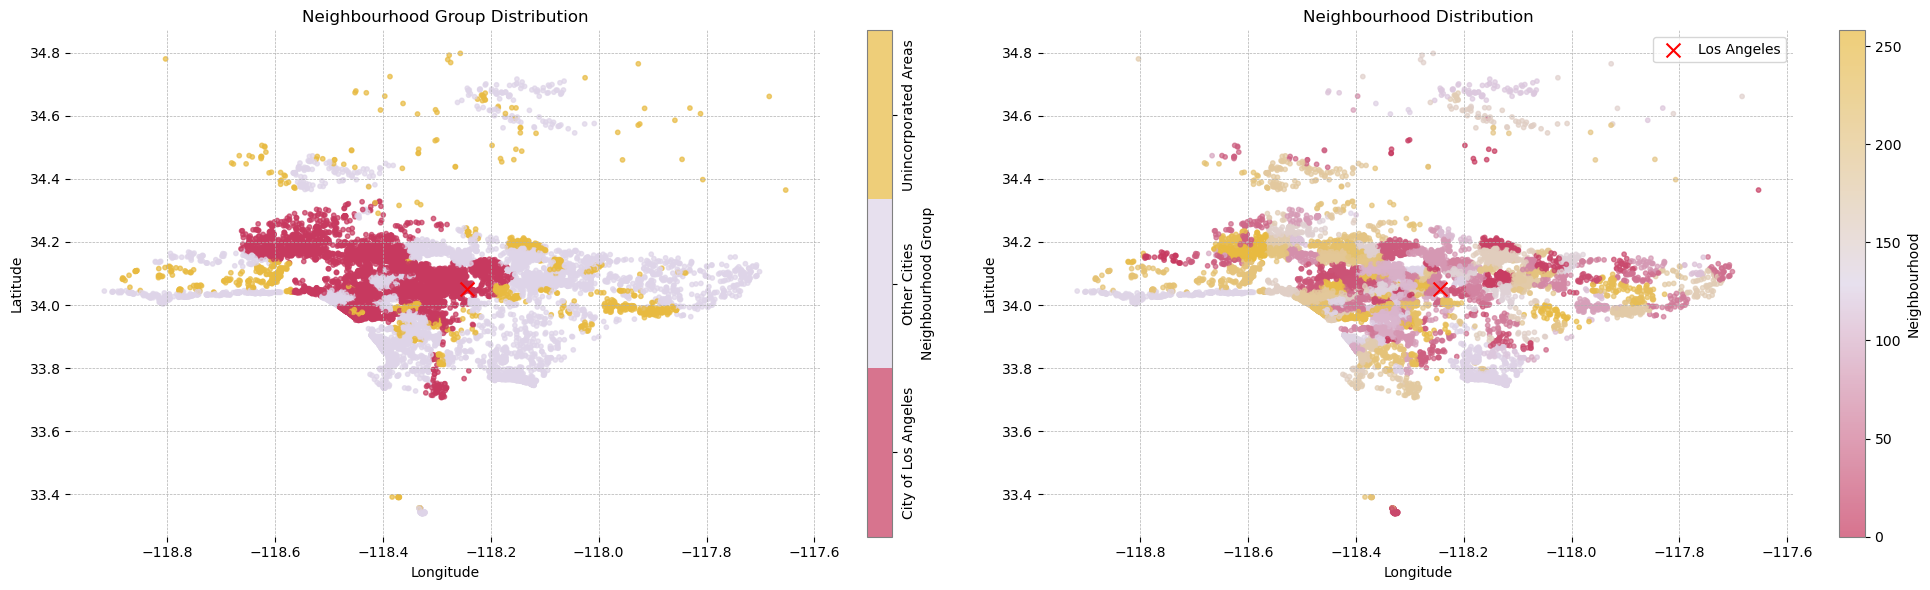

In [22]:
## price by neigh
c1 = pd.Categorical(df['neighbourhood_cleansed'])
codes1 = c1.codes
c2 = pd.Categorical(df['neighbourhood_group_cleansed'])
codes2 = c2.codes
# colors = ['#EDCBD2', '#80C4B7', '#E3856B'] 
colors = ['#C7395F', '#DED4E8', '#E8BA40'] 
# colors = ['#4AAFD5', '#91B187', '#E7A339'] 
# colors = ['#FBEAE7', '#B2456E', '#552619'] 

fig, axs = plt.subplots(1, 2, figsize=(20, 6))
# neigborhood group
cmap = mcolors.ListedColormap(colors)
scatter2 = axs[0].scatter(df['longitude'], df['latitude'], c=codes2, 
                         s=10, marker='o', alpha=0.7, cmap=cmap)
axs[0].scatter(-118.2437, 34.0522, c='red', marker='x', s=100, label='Los Angeles')
axs[0].set_title('Neighbourhood Group Distribution')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].grid(True, linestyle='--', linewidth=0.5)
cbar = plt.colorbar(scatter2, ax=axs[0], ticks=[0.333, 1, 1.667])
cbar.ax.set_yticklabels(c2.categories, rotation=90, verticalalignment='center')
cbar.outline.set_color('grey')
cbar.set_label('Neighbourhood Group')


# Second plot (Neighbourhood) 
# ocean_r, summer_r, ocean, gist_stern_r, gist_stern, gist_earth_r, gist_earth, cubehelix_r
cmap2 = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
scatter1 = axs[1].scatter(df['longitude'], df['latitude'], c=codes1, 
                         s=10, marker='o', alpha=0.7, cmap=cmap2)
cbar2 = plt.colorbar(scatter1, ax=axs[1], label='Neighbourhood')
cbar2.outline.set_color('grey')
axs[1].scatter(-118.2437, 34.0522, c='red', marker='x', s=100, label='Los Angeles')
axs[1].set_title('Neighbourhood Distribution')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].grid(True, linestyle='--', linewidth=0.5)
axs[1].legend()

plt.tight_layout()
plt.savefig('./plot/geo_price_raw.png', format='png', dpi=300)
plt.show()

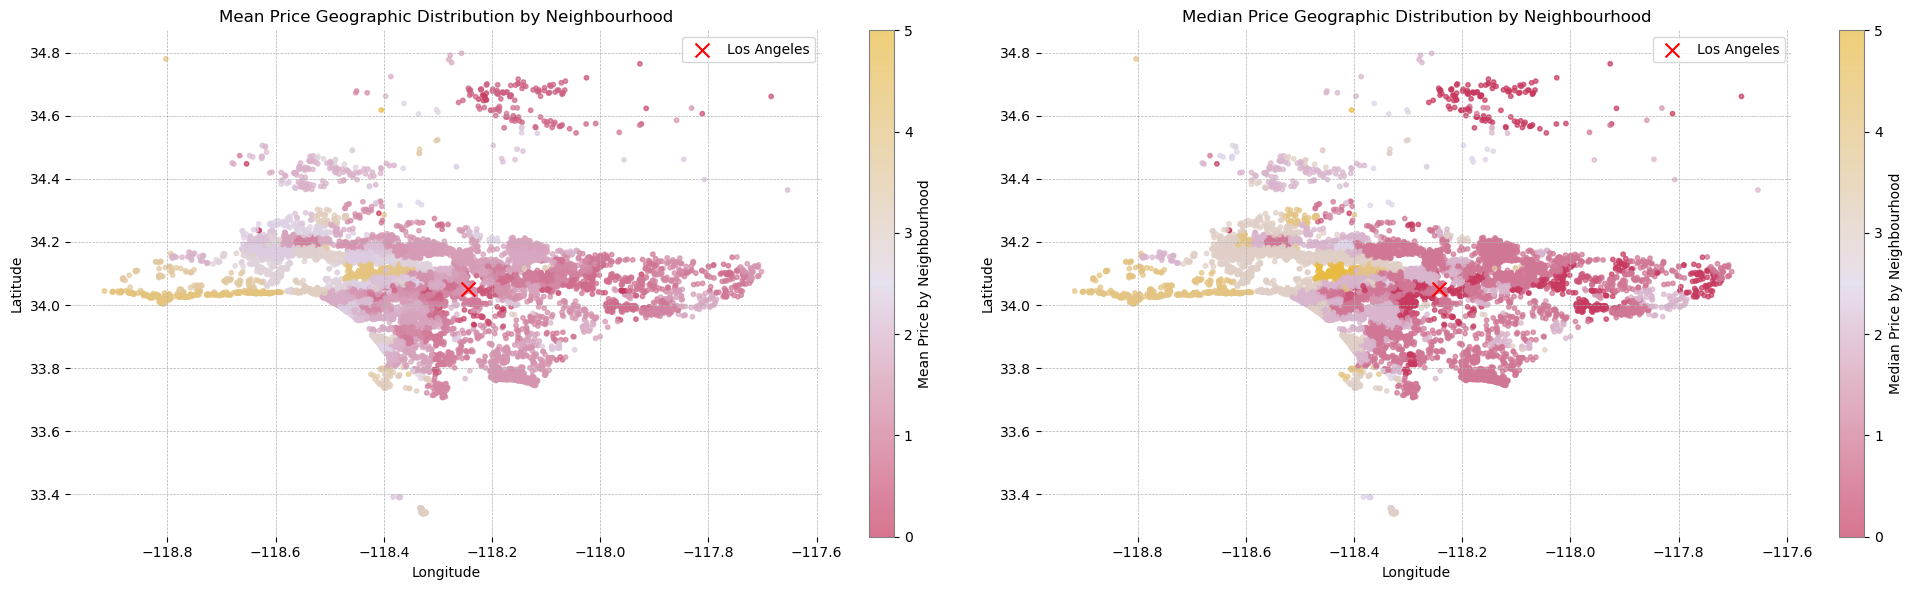

In [146]:
## include this as following the previous plot in the appendix
## we intend to see a tendency of distribution and we are happy to see that there is large difference between the two specific location
df_pri_plot = df.copy()
mean_prices = df.groupby('neighbourhood_cleansed')['price'].mean().reset_index()
mean_prices.rename(columns={'price': 'mean_price'}, inplace=True)
median_prices = df.groupby('neighbourhood_cleansed')['price'].median().reset_index()
median_prices.rename(columns={'price': 'median_price'}, inplace=True)
df_pri_plot = df_pri_plot.merge(mean_prices, on='neighbourhood_cleansed', how='left')
df_pri_plot = df_pri_plot.merge(median_prices, on='neighbourhood_cleansed', how='left')


fig, axs = plt.subplots(1, 2, figsize=(20, 6))
# Mean 
scatter_mean = axs[0].scatter(df_pri_plot['longitude'], df_pri_plot['latitude'], c=df_pri_plot['mean_price'], 
                              s=10, marker='o', alpha=0.7, cmap=cmap2)
cbar_mean = plt.colorbar(scatter_mean, ax=axs[0], label='Mean Price by Neighbourhood')
cbar_mean.outline.set_color('grey')
axs[0].scatter(-118.2437, 34.0522, c='red', marker='x', s=100, label='Los Angeles')
axs[0].set_title('Mean Price Geographic Distribution by Neighbourhood')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')

# Median 
scatter_median = axs[1].scatter(df_pri_plot['longitude'], df_pri_plot['latitude'], c=df_pri_plot['median_price'], 
                                s=10, marker='o', alpha=0.7, cmap=cmap2)
cbar_median = plt.colorbar(scatter_median, ax=axs[1], label='Median Price by Neighbourhood')
cbar_median.outline.set_color('grey')
axs[1].scatter(-118.2437, 34.0522, c='red', marker='x', s=100, label='Los Angeles')
axs[1].set_title('Median Price Geographic Distribution by Neighbourhood')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.legend()

plt.tight_layout()
plt.savefig('./plot/geo_price_mm.png', format='png', dpi=300)
plt.show()

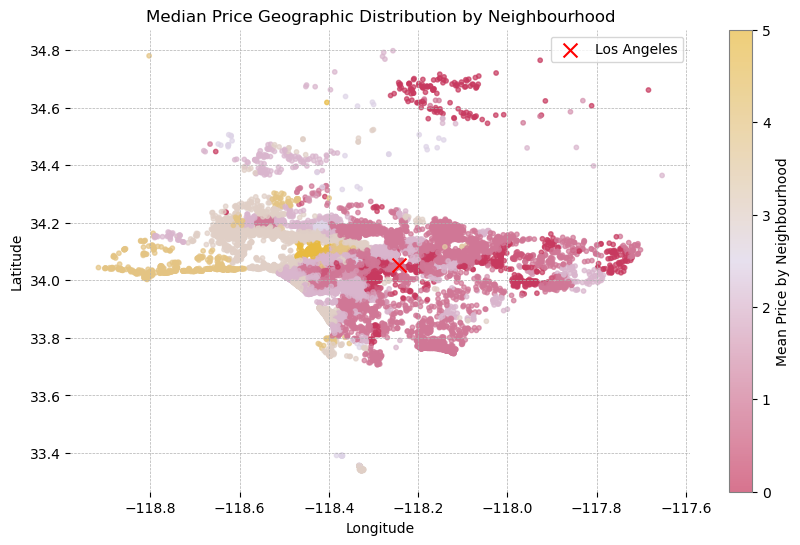

In [23]:
## mean price by neigh
# ocean_r, summer_r, ocean, gist_stern_r, gist_stern, gist_earth_r, gist_earth, cubehelix_r
df_pri_plot = df.copy()
mean_prices = df.groupby('neighbourhood_cleansed')['price'].median().reset_index()
mean_prices.rename(columns={'price': 'mean_price'}, inplace=True)
df_pri_plot = df_pri_plot.merge(mean_prices, on='neighbourhood_cleansed', how='left')
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pri_plot['longitude'], df_pri_plot['latitude'], c=df_pri_plot['mean_price'], 
                      s=10, marker='o', alpha=0.7, cmap=cmap2)
cbar3 = plt.colorbar(scatter, label='Mean Price by Neighbourhood')
cbar3.outline.set_color('grey')
plt.scatter(-118.2437, 34.0522, c='red', marker='x', s=100, label='Los Angeles')
plt.title('Median Price Geographic Distribution by Neighbourhood')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.savefig('./plot/geo_price_m_report.png', format='png', dpi=300)
plt.show()

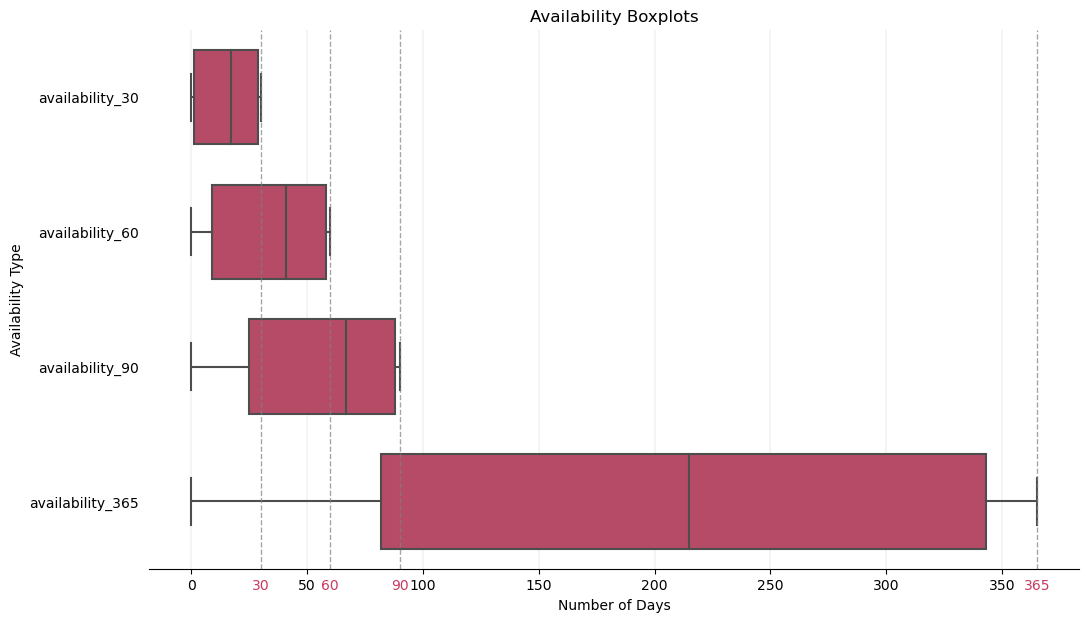

In [18]:
## avaibility
long_df = pd.melt(df, value_vars=['availability_30', 'availability_60', 'availability_90', 'availability_365'], var_name='Availability', value_name='Days')

fig, ax = plt.subplots(figsize=(12, 7))
sns.boxplot(data=long_df, y='Availability', x='Days', ax=ax, color = '#C7395F', width=0.70)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.grid(color='grey', axis='x', linestyle='-', linewidth=0.25, alpha=0.5)

ax.axvline(x=30, color='grey', linestyle='--', linewidth=1, alpha=0.7)
ax.text(30, ax.get_ylim()[0]+0.075, '30', color='#C7395F', ha='center', va='top')
ax.axvline(x=60, color='grey', linestyle='--', linewidth=1, alpha=0.7)
ax.text(60, ax.get_ylim()[0]+0.075, '60', color='#C7395F', ha='center', va='top')
ax.axvline(x=90, color='grey', linestyle='--', linewidth=1, alpha=0.7)
ax.text(90, ax.get_ylim()[0]+0.075, '90', color='#C7395F', ha='center', va='top')
ax.axvline(x=365, color='grey', linestyle='--', linewidth=1, alpha=0.7)
ax.text(365, ax.get_ylim()[0]+0.075, '365', color='#C7395F', ha='center', va='top')

plt.gca().set_axisbelow(True)
ax.set_title('Availability Boxplots')
plt.xlabel('Number of Days')
plt.ylabel('Availability Type')
plt.savefig('./plot/available.png', format='png', dpi=300)
plt.show()

### Simple Cross Validation Output (Plot cleared, please refer to plot folder, plots files prefix as cv)


In [ ]:
## plots with only max_depth parameter varying
import preprocessing1
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score
import xgboost as xgb
import itertools
import warnings
warnings.filterwarnings('ignore')

df_train = pd.read_csv('./raw_data/train.csv')
df_test = pd.read_csv('./raw_data/test.csv')

params_dict = {
    'max_depth': [7,8,9,10,11],
    'n_estimators': [1000],
    'eta': [0.01],
    'gamma':[0.5],
    'subsample': [0.95],
    'colsample_bytree': [0.8],
    'min_child_weight':[3],
    'reg_lambda': [0.1],
    'max_delta_step': [5]
}

best_score = 0
best_params = {}
best_model = None

cv_scores = {}

kf = KFold(n_splits=5, random_state=42, shuffle=True)

for combination in itertools.product(*params_dict.values()):
    params = dict(zip(params_dict.keys(), combination))

    model = xgb.XGBClassifier(
        tree_method='auto',
        enable_categorical=True,
        objective='multi:softprob',
        eval_metric='mlogloss',
        max_depth=params['max_depth'],
        n_estimators=params['n_estimators'],
        eta=params['eta'],
        gamma=params['gamma'],
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        min_child_weight=params['min_child_weight'],
        reg_lambda=params['reg_lambda'],
        max_delta_step = params['max_delta_step'])

    for fold, (train_index, valid_index) in enumerate(kf.split(df_train), 0):
        acc_val = []

        train_set, valid_set = df_train.iloc[train_index], df_train.iloc[valid_index]

        ## clean
        train_clean, median_dict, bound_dict, median_neigh, median_prope= preprocessing1.train_clean_1_(train_set) 
        val_clean = preprocessing1.test_clean_1_(valid_set, median_dict, bound_dict, 
                                                 median_neigh, median_prope, test = False)
        X_train, y_train = (train_clean.drop('price', axis=1)).values, (train_clean['price']).values
        X_valid, y_valid = (val_clean.drop('price', axis=1)).values, (val_clean['price']).values

        ## fit model adn evaluate
        model.fit(X_train, y_train, 
                    early_stopping_rounds=10, eval_set=[(X_valid, y_valid)], verbose=False)
        y_val_pred = model.predict(X_valid)
        acc_val.append(balanced_accuracy_score(y_valid, y_val_pred))

    # Update 
    mean_acc = np.mean(acc_val)
    print('Accuracy: \n  ', mean_acc, '\nParams: \n  ', params)

    cv_scores[params['max_depth']] = mean_acc

max_depths = list(cv_scores.keys())
avg_scores = list(cv_scores.values())

plt.figure(figsize=(10, 6))
plt.plot(max_depths, avg_scores, marker='o', label='CV Score per Max Depth', color = '#C7395F')
plt.axhline(y=0.55939, color='r', linestyle='--', label='Test Set Accuracy (max_depth = 10)')
plt.xlabel('Max Depth')
plt.ylabel('Average CV Score / Test Set Accuracy')
plt.title('Cross-Validation Score and Test Set Accuracy for each Max Depth')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.savefig('./plot/cv_xgb_max_depth.png', format='png', dpi=300)
plt.show()


In [ ]:
## plots with only colsample_bytree parameter varying
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import preprocessing1
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
import xgboost as xgb
import itertools
import warnings
warnings.filterwarnings('ignore')

## import
df_train = pd.read_csv('./raw_data/train.csv')
df_test = pd.read_csv('./raw_data/test.csv')

params_dict = {
    'max_depth': [10],
    'n_estimators': [1000],
    'eta': [0.01],
    'gamma':[0.5],
    'subsample': [0.95],
    'colsample_bytree': [0.7, 0.8, 0.9, 0.95, 1],
    'min_child_weight':[3],
    'reg_lambda': [0.1],
    'max_delta_step': [5]
}

best_score = 0
best_params = {}
best_model = None

cv_scores = {}

kf = KFold(n_splits=5, random_state=42, shuffle=True)

for combination in itertools.product(*params_dict.values()):
    params = dict(zip(params_dict.keys(), combination))

    model = xgb.XGBClassifier(
        tree_method='auto',
        enable_categorical=True,
        objective='multi:softprob',
        eval_metric='mlogloss',
        max_depth=params['max_depth'],
        n_estimators=params['n_estimators'],
        eta=params['eta'],
        gamma=params['gamma'],
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        min_child_weight=params['min_child_weight'],
        reg_lambda=params['reg_lambda'],
        max_delta_step = params['max_delta_step'])

    for fold, (train_index, valid_index) in enumerate(kf.split(df_train), 0):
        acc_val = []

        train_set, valid_set = df_train.iloc[train_index], df_train.iloc[valid_index]

        ## clean
        train_clean, median_dict, bound_dict, median_neigh, median_prope= preprocessing1.train_clean_1_(train_set) 
        val_clean = preprocessing1.test_clean_1_(valid_set, median_dict, bound_dict, 
                                                 median_neigh, median_prope, test = False)
        X_train, y_train = (train_clean.drop('price', axis=1)).values, (train_clean['price']).values
        X_valid, y_valid = (val_clean.drop('price', axis=1)).values, (val_clean['price']).values

        ## fit model adn evaluate
        model.fit(X_train, y_train, 
                    early_stopping_rounds=10, eval_set=[(X_valid, y_valid)], verbose=False)
        y_val_pred = model.predict(X_valid)
        acc_val.append(balanced_accuracy_score(y_valid, y_val_pred))

    # Update 
    mean_acc = np.mean(acc_val)
    print('Accuracy: \n  ', mean_acc, '\nParams: \n  ', params)

    cv_scores[params['colsample_bytree']] = mean_acc

colsample_bytrees = list(cv_scores.keys())
avg_scores = list(cv_scores.values())

plt.figure(figsize=(10, 6))
plt.plot(colsample_bytrees, avg_scores, marker='o', label='CV Score per Colsample_bytree', color = '#C7395F')
plt.axhline(y=0.55939, color='r', linestyle='--', label='Test Set Accuracy (max_depth = 10, colsample_bytrees = 0.95)')
plt.xlabel('Colsample_bytree')
plt.ylabel('Average CV Score / Test Set Accuracy')
plt.title('Cross-Validation Score and Test Set Accuracy for each Colsample_bytree')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.savefig('./plot/cv_xgb_coltree.png', format='png', dpi=300)
plt.show()


In [ ]:
## CV for Random Forest 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import preprocessing2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import balanced_accuracy_score
# import xgboost as xgb
import itertools
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
## import
df_train = pd.read_csv('./raw_data/train.csv')
df_test = pd.read_csv('./raw_data/test.csv')

params_dict = {
    'max_depth': [7,8,9,10,11],
    'n_estimators': [1000],
    'min_samples_split': [5],
    'min_samples_leaf': [6],
    'max_features': ['sqrt'],
    'class_weight': ['balanced']}

best_score = 0
best_params = {}
best_model = None

cv_scores = {}

kf = KFold(n_splits=5, random_state=42, shuffle=True)

for combination in itertools.product(*params_dict.values()):
    params = dict(zip(params_dict.keys(), combination))

    model = RandomForestClassifier(
        max_depth=params['max_depth'],
        n_estimators=params['n_estimators'],
        min_samples_split=params['min_samples_split'],
        min_samples_leaf=params['min_samples_leaf'],
        max_features=params['max_features'],
        class_weight=params['class_weight'])

    for fold, (train_index, valid_index) in enumerate(kf.split(df_train), 0):
        acc_val = []

        train_set, valid_set = df_train.iloc[train_index], df_train.iloc[valid_index]

        ## clean
        train_clean, median_dict, bound_dict, median_neigh, median_prope, glob_med_neigh, glob_med_prope= preprocessing2.train_clean_2_(train_set) 
        val_clean = preprocessing2.test_clean_2_(valid_set, median_dict, bound_dict, 
                                                    median_neigh, median_prope, glob_med_neigh, glob_med_prope, test = False)
        X_train, y_train = (train_clean.drop('price', axis=1)).values, (train_clean['price']).values
        X_valid, y_valid = (val_clean.drop('price', axis=1)).values, (val_clean['price']).values

        ## fit model adn evaluate
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_valid)
        acc_val.append(balanced_accuracy_score(y_valid, y_val_pred))

    # Update 
    mean_acc = np.mean(acc_val)
    print('Accuracy: \n  ', mean_acc, '\nParams: \n  ', params)
    
    cv_scores[params['max_depth']] = mean_acc

max_depths = list(cv_scores.keys())
avg_scores = list(cv_scores.values())

plt.figure(figsize=(10, 6))
plt.plot(max_depths, avg_scores, marker='o', label='CV Score per max_depth', color = '#C7395F')
plt.axhline(y=0.55939, color='r', linestyle='--', label='Test Set Accuracy (max_depth = 10)')
plt.xlabel('Max_depth')
plt.ylabel('Average CV Score / Test Set Accuracy')
plt.title('Cross-Validation Score and Test Set Accuracy for each Max_depth')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.savefig('./plot/cv_rf_coltree.png', format='png', dpi=300)
plt.show()



Accuracy: 
   0.5421591847285029 
Params: 
   {'max_depth': 10, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'class_weight': 'balanced'}
Accuracy: 
   0.549159849112973 
Params: 
   {'max_depth': 10, 'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'class_weight': 'balanced'}
Accuracy: 
   0.5467978669244934 
Params: 
   {'max_depth': 10, 'n_estimators': 700, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'class_weight': 'balanced'}
Accuracy: 
   0.539732707196818 
Params: 
   {'max_depth': 10, 'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'class_weight': 'balanced'}
Accuracy: 
   0.5446365540658024 
Params: 
   {'max_depth': 10, 'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'class_weight': 'balanced'}


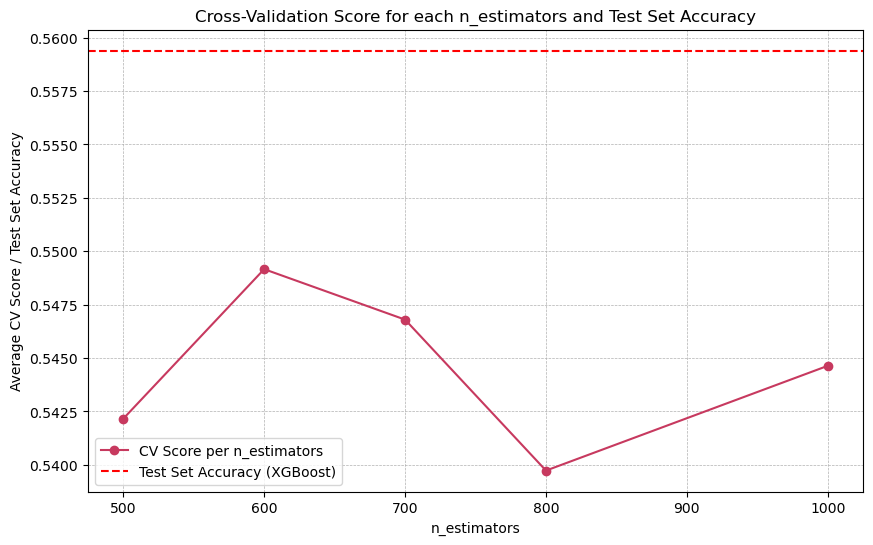

In [8]:
## CV for Random Forest 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import preprocessing2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import balanced_accuracy_score
# import xgboost as xgb
import itertools
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
## import
df_train = pd.read_csv('./raw_data/train.csv')
df_test = pd.read_csv('./raw_data/test.csv')

params_dict = {
    'max_depth': [10],
    'n_estimators': [500, 600, 700, 800, 1000],
    'min_samples_split': [5],
    'min_samples_leaf': [6],
    'max_features': ['sqrt'],
    'class_weight': ['balanced']}

best_score = 0
best_params = {}
best_model = None

cv_scores = {}

kf = KFold(n_splits=5, random_state=42, shuffle=True)

for combination in itertools.product(*params_dict.values()):
    params = dict(zip(params_dict.keys(), combination))

    model = RandomForestClassifier(
        max_depth=params['max_depth'],
        n_estimators=params['n_estimators'],
        min_samples_split=params['min_samples_split'],
        min_samples_leaf=params['min_samples_leaf'],
        max_features=params['max_features'],
        class_weight=params['class_weight'])

    for fold, (train_index, valid_index) in enumerate(kf.split(df_train), 0):
        acc_val = []

        train_set, valid_set = df_train.iloc[train_index], df_train.iloc[valid_index]

        ## clean
        train_clean, median_dict, bound_dict, median_neigh, median_prope, glob_med_neigh, glob_med_prope= preprocessing2.train_clean_2_(train_set) 
        val_clean = preprocessing2.test_clean_2_(valid_set, median_dict, bound_dict, 
                                                    median_neigh, median_prope, glob_med_neigh, glob_med_prope, test = False)
        X_train, y_train = (train_clean.drop('price', axis=1)).values, (train_clean['price']).values
        X_valid, y_valid = (val_clean.drop('price', axis=1)).values, (val_clean['price']).values

        ## fit model adn evaluate
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_valid)
        acc_val.append(balanced_accuracy_score(y_valid, y_val_pred))

    # Update 
    mean_acc = np.mean(acc_val)
    print('Accuracy: \n  ', mean_acc, '\nParams: \n  ', params)
    
    cv_scores[params['n_estimators']] = mean_acc

n_estimators = list(cv_scores.keys())
avg_scores = list(cv_scores.values())

plt.figure(figsize=(10, 6))
plt.plot(n_estimators, avg_scores, marker='o', label='CV Score per n_estimators', color = '#C7395F')
plt.axhline(y=0.55939, color='r', linestyle='--', label='Test Set Accuracy (XGBoost)')
plt.xlabel('n_estimators')
plt.ylabel('Average CV Score / Test Set Accuracy')
plt.title('Cross-Validation Score for each n_estimators and Test Set Accuracy')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.savefig('./plot/cv_rf_n.png', format='png', dpi=300)
plt.show()

### Var Importance

In [4]:
import preprocessing1
import pandas as pd
df_train = pd.read_csv('./raw_data/train.csv')
train_clean, median_dict, bound_dict, median_neigh, median_prope= preprocessing1.train_clean_1_(df_train)
train_clean.describe()

,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,...,calculated_host_listings_count_shared_rooms,veri_email,veri_phone,veri_work_email,rating,bedrooms,beds,bath_num,bath_share,price
count,15433.000000,15433.000000,15433.000000,15433.000000,15433.000000,15433.000000,15433.000000,15433.000000,15433.000000,15433.000000,...,15433.000000,15433.000000,15433.000000,15433.000000,15433.000000,15433.000000,15433.000000,15433.000000,15433.000000,15433.000000
mean,2343.186548,0.319964,117.394415,174.864446,0.978099,0.894123,1.863798,34.049977,-118.340463,1.911942,...,0.086438,0.916866,0.998445,0.143135,4.833238,2.313355,2.754358,1.963617,0.061492,1.961576
std,1237.508451,0.466477,597.621246,813.690879,0.146365,0.307690,1.069488,0.140959,0.169928,1.261002,...,1.475888,0.276093,0.039405,0.350222,0.215228,1.412715,1.927633,1.413109,0.240238,1.620009
min,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.338600,-118.916410,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1322.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,33.997750,-118.438220,1.000000,...,0.000000,1.000000,1.000000,0.000000,4.850000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,2526.000000,0.000000,3.000000,5.000000,1.000000,1.000000,2.000000,34.061960,-118.361900,2.000000,...,0.000000,1.000000,1.000000,0.000000,4.880000,2.000000,2.000000,1.500000,0.000000,2.000000
75%,3293.000000,1.000000,14.000000,23.000000,1.000000,1.000000,3.000000,34.108090,-118.259989,3.000000,...,0.000000,1.000000,1.000000,0.000000,4.910000,3.000000,4.000000,2.500000,0.000000,3.000000
max,5625.000000,1.000000,4576.000000,9168.000000,1.000000,1.000000,5.000000,34.797857,-117.653360,5.000000,...,44.000000,1.000000,1.000000,1.000000,5.000000,32.000000,50.000000,36.000000,1.000000,5.000000


<Figure size 1200x2000 with 0 Axes>

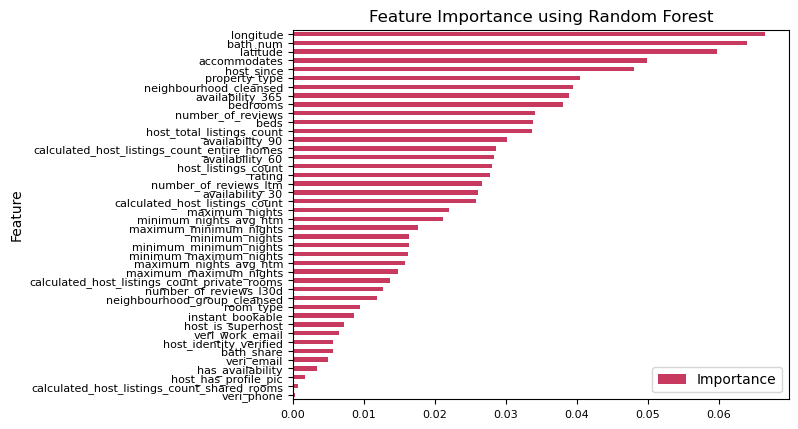

In [16]:
from sklearn.ensemble import RandomForestClassifier

plt.figure(figsize=(12, 20))
rf = RandomForestClassifier(n_estimators=100)
X, y = train_clean.drop('price', axis=1), train_clean['price']
feature_names = X.columns
rf.fit(X, y)
feature_importance = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=True)
importance_df.plot(kind='barh', x='Feature', y='Importance', fontsize=8,color = '#C7395F')

plt.title('Feature Importance using Random Forest')
plt.savefig('./plot/fi_rf.png', format='png', dpi=300)
plt.show()

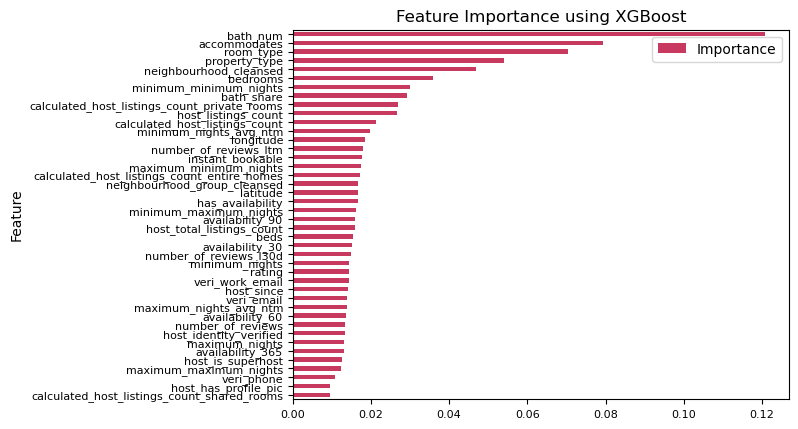

In [17]:
import xgboost as xgb
import matplotlib.pyplot as plt

X, y = train_clean.drop('price', axis=1), train_clean['price']
feature_names = X.columns
xg_model = xgb.XGBClassifier(enable_categorical = True) 
xg_model.fit(X, y)
xgb_feature_importance = xg_model.feature_importances_
xgb_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': xgb_feature_importance})
xgb_importance_df = xgb_importance_df.sort_values(by='Importance', ascending=True)
ax = xgb_importance_df.plot(kind='barh', x='Feature', y='Importance', fontsize=8, color = '#C7395F')  

plt.title('Feature Importance using XGBoost', fontsize=12) 
plt.savefig('./plot/fi_xgb.png', format='png', dpi=300)
plt.show()


### Model Performance (Plot Cleared, please refer to plot folder: scores.png + price_pred.png)

In [ ]:
### Model Performance
import pandas as pd
import numpy as np
import preprocessing1
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import balanced_accuracy_score, accuracy_score, roc_auc_score, f1_score
import xgboost as xgb
import itertools

import warnings
warnings.filterwarnings('ignore')

## import
df_train = pd.read_csv('./raw_data/train.csv')
df_test = pd.read_csv('./raw_data/test.csv')

# test dict
params_dict = {
    'max_depth': [10],
    'n_estimators': [1000],
    'eta': [0.01],
    'gamma':[0.1],
    'subsample': [0.6],
    'colsample_bytree': [0.8],
    'min_child_weight':[1],
    'reg_lambda': [0.01],
    'max_delta_step': [7]
}
best_score = 0
best_params = {}
metrics = {'balanced_acc': [], 'acc': [], 'auc': [], 'f1': []}

kf = KFold(n_splits=5, random_state=42, shuffle=True)

for combination in itertools.product(*params_dict.values()):
    params = dict(zip(params_dict.keys(), combination))
    temp_metrics = {'balanced_acc': [], 'acc': [], 'auc': [], 'f1': []}

    model = xgb.XGBClassifier(
        tree_method='auto',
        enable_categorical=True,
        objective='multi:prob',
        eval_metric='mlogloss',
        max_depth=params['max_depth'],
        n_estimators=params['n_estimators'],
        eta=params['eta'],
        gamma=params['gamma'],
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        min_child_weight=params['min_child_weight'],
        reg_lambda=params['reg_lambda'])

    for fold, (train_index, valid_index) in enumerate(kf.split(df_train), 0):

        train_set, valid_set = df_train.iloc[train_index], df_train.iloc[valid_index]

        ## clean
        train_clean, median_dict, bound_dict, median_neigh, median_prope, glob_med_neigh, glob_med_prope= preprocessing2.train_clean_2_(train_set) 
        val_clean = preprocessing2.test_clean_2_(valid_set, median_dict, bound_dict, 
                                                    median_neigh, median_prope, glob_med_neigh, glob_med_prope, test = False)
        X_train, y_train = (train_clean.drop('price', axis=1)).values, (train_clean['price']).values
        X_valid, y_valid = (val_clean.drop('price', axis=1)).values, (val_clean['price']).values

        ## fit model adn evaluate
        model.fit(X_train, y_train, 
                    early_stopping_rounds=10, eval_set=[(X_valid, y_valid)], verbose=False)
        y_val_pred = model.predict(X_valid)
        temp_metrics['balanced_acc'].append(balanced_accuracy_score(y_valid, y_val_pred))
        temp_metrics['acc'].append(accuracy_score(y_valid, y_val_pred))
        temp_metrics['auc'].append(roc_auc_score(y_valid, model.predict_proba(X_valid), multi_class='ovo'))
        temp_metrics['f1'].append(f1_score(y_valid, y_val_pred, average='weighted'))

    for key in metrics.keys():
        metrics[key].append(np.mean(temp_metrics[key]))

## plot metrics
metric_names = ['Balanced Accuracy', 'Accuracy', 'AUC', 'F1 Score']
metric_values = [np.mean(metrics['balanced_acc']), 
                 np.mean(metrics['acc']), 
                 np.mean(metrics['auc']), 
                 np.mean(metrics['f1'])]

plt.figure(figsize=(10, 6))
bars = plt.bar(metric_names, metric_values, color=['#C7395F', '#C7395F', '#C7395F', '#C7395F'])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
plt.grid(True, color='#EEEEEE', axis='y')
plt.gca().set_axisbelow(True)

plt.title('Model Performance Metrics')
plt.ylabel('Average Score')
plt.savefig('./plot/scores.png', format='png', dpi=300)
plt.show()

In [ ]:
## test output
train_clean, median_dict, bound_dict, median_neigh, median_prope, glob_med_neigh, glob_med_prope= preprocessing2.train_clean_2_(df_train)
test_clean = preprocessing2.test_clean_2_(df_test, median_dict, bound_dict, 
                                            median_neigh, median_prope, glob_med_neigh, glob_med_prope, test = True)
X_train, y_train = (train_clean.drop('price', axis=1)).values, (train_clean['price']).values
X_test = test_clean.values

best_model = xgb.XGBClassifier(
    tree_method='auto',
    enable_categorical=True,
    objective='multi:softmax',
    eval_metric='mlogloss',
    **best_params  
)

best_model.fit(X_train, y_train, verbose=False)
y_pred = best_model.predict(X_test)

df_predictions = pd.DataFrame({'id': range(len(y_pred)) , 'Price': y_pred})
df_predictions.to_csv('submission_tt.csv', index=False)

plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df_predictions, x = 'Price', color = '#E8BA40')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
plt.grid(True, color='#EEEEEE', axis='y')
plt.gca().set_axisbelow(True)
plt.suptitle('Price Distribution', fontsize=12)
plt.savefig('./plot/price_pred.png', format='png', dpi=300)
plt.show()

### Explore on Amenities

In [7]:
df[['description', 'amenities', 'price']].head(80)

,description,amenities,price
0,"Beautifully designed decor, lighting and enter...","[""Stove"", ""Iron"", ""Window guards"", ""Smoking al...",0.0
1,The location is great - the apt is HUGH 1877 S...,"[""Stove"", ""Carbon monoxide alarm"", ""Iron"", ""Fr...",3.0
2,"315 Eucalyptus Lower<br />Spacious, Remodeled ...","[""Stove"", ""Carbon monoxide alarm"", ""Iron"", ""Ho...",2.0
3,Close to almost everything when you stay at th...,"[""Free parking on premises"", ""Smoke alarm"", ""C...",3.0
4,Enjoy the thrill of staying in a hotel located...,"[""Carbon monoxide alarm"", ""Iron"", ""Air conditi...",4.0
5,This tastefully remodeled Burbank Hills view h...,"[""Stove"", ""Carbon monoxide alarm"", ""Valley vie...",3.0
6,HSR22-003757<br /><br />New Contemporary Home....,"[""Stove"", ""Carbon monoxide alarm"", ""Iron"", ""Fr...",5.0
7,Ultra luxury and spacious 3b3.5b townhome in u...,"[""Free parking on premises"", ""Smoke alarm"", ""C...",1.0
8,Best Location in Malibu! Private escape w/Pool...,"[""Stove"", ""Carbon monoxide alarm"", ""Iron"", ""Ai...",5.0
9,Feel like a Los Angeles native when you stay i...,"[""Bed linens"", ""Body soap"", ""Smoke alarm"", ""Ho...",4.0


In [10]:
import utils
import ast
df_clean = df_train.copy()
df_clean['amenities'] = df_clean['amenities'].apply(ast.literal_eval)
a = utils.count_luxury_amenities(df_clean['amenities'].loc[6])
a

5

In [6]:
import utils
df_clean = df_train.copy()
a = utils.count_luxury_amenities(df_clean['amenities'].loc[6])
a
# df_clean['lux_amen_count'] = df_clean['amenities'].apply(utils.count_luxury_amenities)



0

In [4]:
import pandas as pd
import preprocessing1
df_train = pd.read_csv('./raw_data/train.csv')
train_clean, median_dict, bound_dict, median_neigh, median_prope= preprocessing1.train_clean_1_(df_train)
train_clean[['lux_amen_count', 'price']].head(20)

,lux_amen_count,price
0,0,0.0
1,0,3.0
2,0,2.0
3,0,3.0
4,0,4.0
5,0,3.0
6,0,5.0
7,0,1.0
8,0,5.0
9,0,4.0


In [ ]:
print(df.amenities.loc[0])
print(df.amenities.loc[11])
print(df.amentities.loc[59])
print(df.amentities.loc[56])
print(df.amentities.loc[52])
print(df.amentities.loc[42])


In [8]:
print(df.amenities.loc[6])
print(df.amenities.loc[18])
print(df.amenities.loc[37])
print(df.amenities.loc[53])
print(df.amenities.loc[47])
print(df.amenities.loc[73])
print(df.amenities.loc[71])

["Stove", "Carbon monoxide alarm", "Iron", "Freezer", "Dining table", "Air conditioning", "Pool", "Microwave", "Luggage dropoff allowed", "Bathtub", "Cleaning products", "Smoke alarm", "First aid kit", "Indoor fireplace", "Baking sheet", "Essentials", "Conditioner", "Refrigerator", "Shower gel", "Hot tub", "Fire extinguisher", "Dryer", "Body soap", "Extra pillows and blankets", "BBQ grill", "Hot water", "Oven", "Private entrance", "Long term stays allowed", "Washer", "Shampoo", "Kitchen", "Wifi", "Patio or balcony", "Free parking on premises", "Barbecue utensils", "Dishes and silverware", "Dishwasher", "Clothing storage", "Coffee maker", "Cooking basics", "Hangers", "TV", "Outdoor furniture", "Security cameras on property", "Hair dryer", "Heating", "Cleaning available during stay"]
["Free parking on premises", "Smoke alarm", "Carbon monoxide alarm", "Kitchen", "Washer", "Essentials", "Air conditioning", "Pool", "TV with standard cable", "Wifi", "Hot tub", "Heating", "Dryer"]
["Carbon m